In [1]:
debug=False

import sys
sys.path.append("../modules")

from HPIB4155 import *
from HPIB_plot import*

GPIBch='GPIB0::17'

timeout=30

In [2]:
ptype=True
temp=3.2

VGS = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : '50m', 'Compliance' : '1.5m'
    }

# SubVt = {
#     'enable' : True,
#     'VGstart' : Vt-0.2, 'VGstop' : Vt+0.2, 'VGstep' : '1m',
#     'VD' : '10m', 'Compliance' : '10m'
#     }
    
VGS_sat = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : 1.5, 'Compliance' : '1.5m'
    }

VDS = {
    'enable' : True,
    'VDstart' : 0, 'VDstop' : 1.5, 'VDstep' : 0.01,
    'VGstart' : 0.6, 'VGstop' : 1.5, 'VGstep' : 0.15,
    'Compliance' : '1.5m'
    }

Ex_Is = {
    'enable' : True,
    'VSstart' : 0, 'VSstop' : 0.5, 'VSstep' : 0.001,
    'VGstart' : 0.8, 'VGstop' : 1, 'VGstep' : 0.1,
    'VDvalue' : 1,
    'Compliance' : '1.5m'
    }

VP = {
    'enable' : True,
    'VGstart' : -1.5, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'Is' : -2.98e-06, 'Compliance' : 1.5
    }

In [2]:
HP=HP4155(GPIBch, debug=debug)
HP.StopFlag=False

HP.reset()

HP.beep()

VisaIOError: VI_ERROR_ALLOC (-1073807300): Insufficient system resources to perform necessary memory allocation.

In [4]:
HP.ask("*IDN?")

'HEWLETT-PACKARD,4155A,0,01.04:01.04:01.00'

In [5]:
prefix=input()

now=datetime.datetime.now().strftime('%y%m%d')

if os.path.isdir('C:/Users/Zucchi/Documents/Medidas'):
    path='C:/Users/Zucchi/Documents/Medidas'
else: 
    path="C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas"

path+=f"/{prefix}/"

print(path)

os.makedirs(path, exist_ok=True)

 N4007


C:/Users/Zucchi/Documents/Medidas/N4007/


In [15]:
HP.SetVar("VAR1", "V", -0.6, 0.6, 0.01, Comp=2e-3)

0

Set Diode
Vf=(-0.6, 0.6)


'+++++++++'

'C:/Users/Zucchi/Documents/Medidas/N4007/Diode-240513 165653.png'

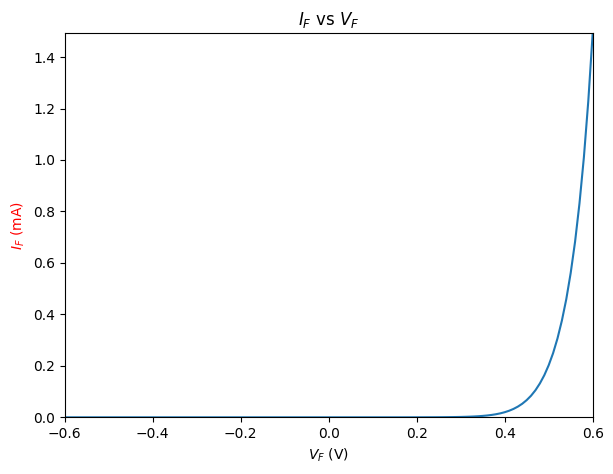

In [7]:
HP.SingleDiode(-0.6, 0.6, 0.01)

HP.SetIntTime("MED")

now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}{HP.term}-{now}-77K.csv"

HP.SingleSave(plotp, timeout)
Plot(plotp, "VF", "IF")

Set Diode
Vf=(0, -1.2)


'Start+++'

...

'C:/Users/Zucchi/Documents/Medidas/Teste/Diode-231212 133810.png'

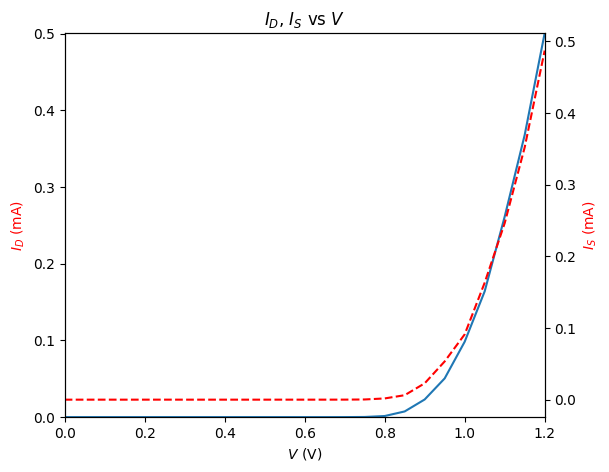

In [10]:
if ptype:
    HP.SetDiode(0, 1.2, 0.05)
else:
    HP.SetDiode(0, -1.2, 0.05)
HP.SetIntTime("SHOR")

now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}{HP.term}-{now}.csv"

HP.SingleSave(plotp, timeout)
Plot(plotp, "VF", "IF")

In [11]:
HP.SetIntTime("LONG")
HP.ask(":PAGE:MEAS:MSET:ITIM?")

'LONG'

In [12]:
if VGS['enable']:
    HP.SetVGS(VGS, ptype)
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVgs
 Vg=(0, -1.5, -0.01), Vd=-0.05, Ilim=0.0015


'++++++++++++++'

.........................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............................HP blink 30s
.............-0.685


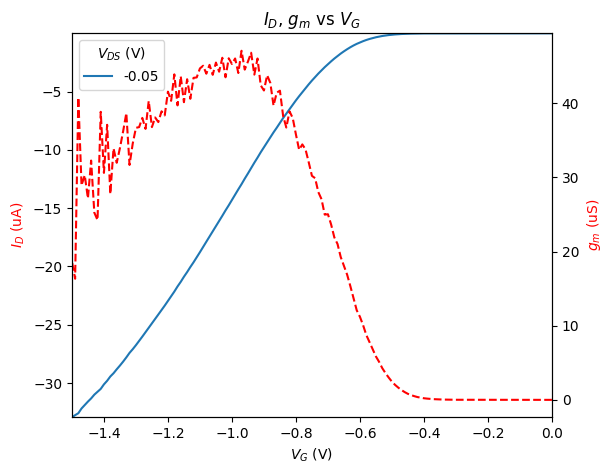

In [13]:
if VGS['enable']:
    HP.SingleSave(plotp, timeout*5)
    VTO=PlotVgs(plotp)
    print(VTO)

In [9]:
if VGS_sat['enable']:
    HP.SetVGS(VGS_sat, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVgs Sat
 Vg=(0, -1.5, -0.01), Vd=-1.5, Ilim=0.0015


HP Blink 60s
HP Blink 60s


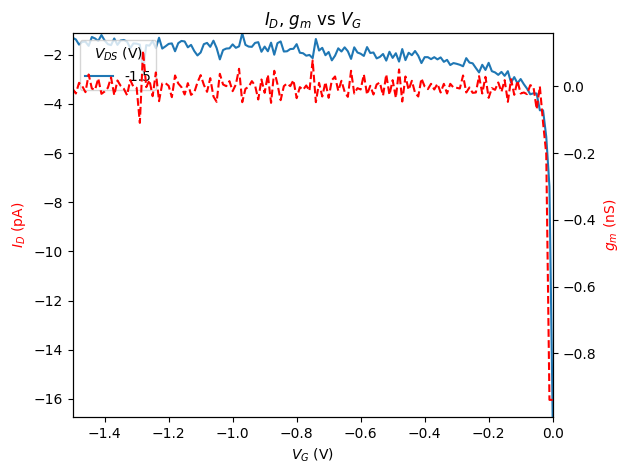

In [10]:
if VGS_sat['enable']:
    HP.SingleSave(plotp, timeout*60)
    PlotVgs(plotp)

In [11]:
if Ex_Is['enable']:
    HP.SetEXIS(Ex_Is, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set Ex_Is
 Vs=(0, -0.5, -0.001), Vg=(-0.8, -1, -0.1), Vd=-1


HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
[2.96502824e-14 1.55577310e-20 1.42093489e-20]
Is=9.88e-15   AbsDev: 3.953368995958934e-14


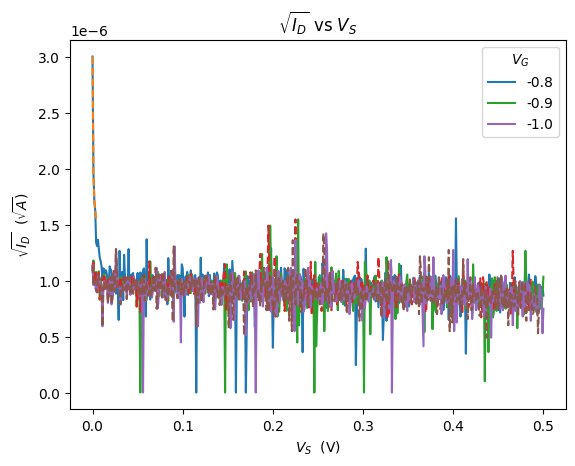

In [12]:
if Ex_Is['enable']:    
    HP.SingleSave(plotp, timeout*7)
    iscalc=plotp
    VP['Is']=CalcIs(iscalc, temp, ptype)

In [13]:
if VP['enable']:
    HP.SetVP(VP, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set VpxVgs
Is=-9.883437373437257e-15, Vg=(1.5, -1.5, -0.01), Vlim=1.5


HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s


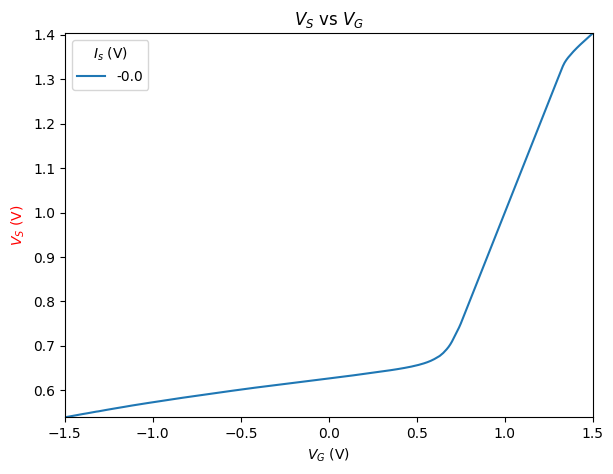

In [14]:
if VP['enable']: 
    HP.SingleSave(plotp, timeout*60)
    Plot(plotp, 'VG', 'VS')

In [15]:
df=pd.read_csv(plotp, header=[0, 1])
VS=np.abs(df['VS'][df['VS'].columns[0]])
VG=df['VG'][df['VS'].columns[0]]
VG[np.argmin(VS)]

-1.5

In [16]:
if VDS['enable']:
    HP.SetVDS(VDS, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVds
Vd=(0, -1.5, -0.01), Vg=(-0.6, -1.5, -0.15), Ilim=0.0015


HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s
HP Blink 60s


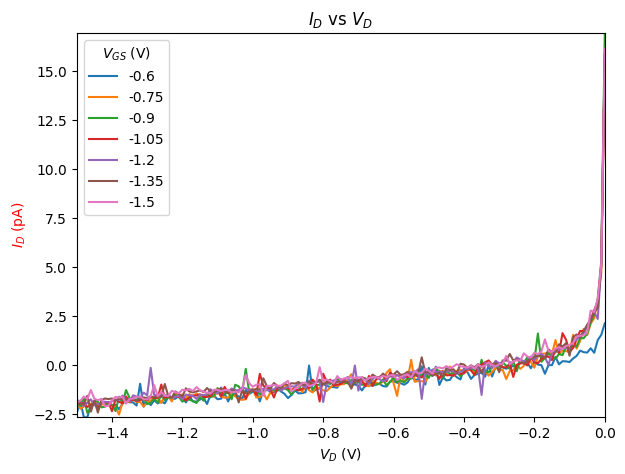

In [17]:
if VDS['enable']:
    HP.SingleSave(plotp, timeout*60*7)
    Plot(plotp, 'VD', 'ID')